In [152]:
import numpy
import math
from matplotlib import pyplot
% matplotlib inline

In [153]:
N=51
x_start,x_end=-1,2
y_start,y_end=-0.5,0.5
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [154]:
x_source=numpy.loadtxt("AeroPython/lessons/resources/NACA0012_x.txt")
y_source=numpy.loadtxt("AeroPython/lessons/resources/NACA0012_y.txt")
sigma=numpy.loadtxt("AeroPython/lessons/resources/NACA0012_sigma.txt")
numpy.shape(x_source)

(100,)

In [155]:
numpy.shape(x_source)

(100,)

In [156]:
u_inf=1
u_freestream=u_inf*numpy.ones((N,N),dtype=float)
v_freestream=numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [157]:

def get_velocity(sigma, x_source, y_source, X, Y):
    u = sigma/(2*numpy.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2)
    v = sigma/(2*numpy.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2)
    
    return u, v


In [166]:
U_source=0.0
V_source=0.0
for i in range(100):
    u_source,v_source = get_velocity(sigma[i], x_source[i], y_source[i], X, Y)
    U_source += u_source
    V_source += v_source


In [167]:
def get_stream_function(sigma, x_source, y_source, X, Y):
    psi = sigma/(2*numpy.pi)*numpy.arctan2((Y-y_source), (X-x_source))
    
    return psi

In [172]:
Psi_source=0.0
for i in range(100):
    psi_source = get_stream_function(sigma[i], x_source[i], y_source[i], X, Y)
    Psi_source +=psi_source

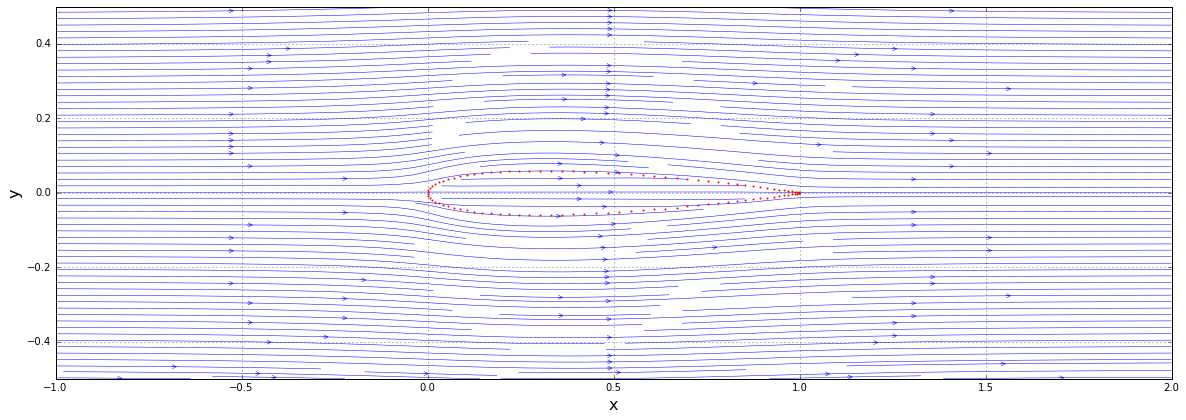

In [176]:
# superposition of the source on the freestream
u = u_freestream + U_source
v = v_freestream + V_source
psi = psi_freestream + Psi_source

# plot the streamlines
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=0.5, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='r', s=1, marker='o')


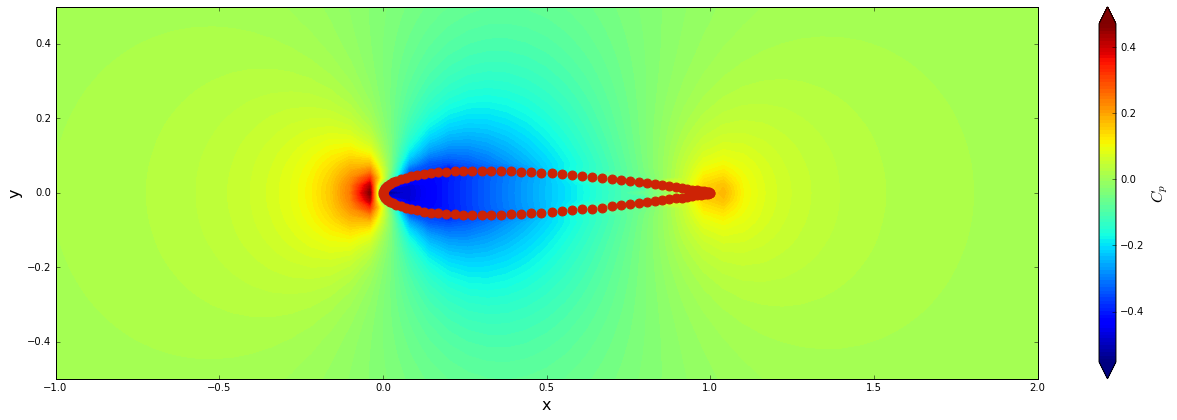

In [186]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 20
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(numpy.min(cp),numpy.max(cp), 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

In [175]:
numpy.max(cp)

0.47144366133162408